对纽约公寓租赁数据进行特征工程

我们以Kaggle2017年举办的Two Sigma Connect: Rental Listing Inquiries竞赛数据为例进行数据集探索分析。 可以参考kernel中更多数据分析示例：https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries/kernels 竞赛官网：https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries/data


In [107]:
#首先 import 必要的模块
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
#color = sns.color_palette()

%matplotlib inline

In [108]:
# path to where the data lies
dpath = '../data/'

import zipfile

def unzipFile(zipFile):
    zfile = zipfile.ZipFile(zipFile,'r')
    for filename in zfile.namelist():
      data = zfile.read(filename)
      file = open(filename, 'w+b')
      file.write(data)
      file.close()    
    return 0

unzipFile(dpath + 'RentListingInquries_train.zip')
unzipFile(dpath + 'RentListingInquries_test.zip')

0

In [109]:
import os
import glob

def deleteFileByPattern(fileNamePattern):
    for fileName in glob.glob(fileNamePattern):
       print(fileName)
       os.remove(fileName)
    return 1

#deleteFileByPattern("./RentListingInquries*")

In [110]:
train = pd.read_json("RentListingInquries_train.json")

#train.to_csv(dpath + "RentListingInquries_test.csv")

train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,low
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street,high
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street,low
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street,low


In [111]:
print("Train :", train.shape)
#print("Test : ", test.shape)

Train : (49352, 15)


In [112]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
interest_level     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [113]:
##Describe gives statistical information about numerical columns in the dataset
train.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [114]:
### ... check for NAs
train.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64

查看每个变量的分布

在Python中，有很多数据可视化途径。 Matplotlib非常强大，也很复杂。你可以使用它做几乎所有的事情，然而，它并不是很易于学习。 很多工具(尤其是Pandas和Seaborn)都对它进行了封装。 pandas提供内置的图表功能，可使用pandas.DataFrame画各种图形。Pandas对于简单绘图，可以随手用，但你需要学习定制matplotlib。 Seaborn是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。
Target Variable： 'interest level'


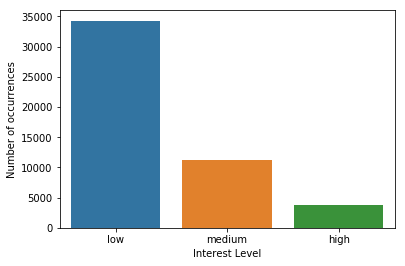

In [115]:
#该问题为分类问题，类别型特征直方图可用countplot
sns.countplot(train.interest_level, order=['low', 'medium', 'high']);
plt.xlabel('Interest Level');
plt.ylabel('Number of occurrences');

In [116]:
### Quantitative substitute of Interest Level
# 用有序数字编码：0:low；1:medium；2:high
train['interest'] = np.where(train.interest_level=='low', 0,
                                  np.where(train.interest_level=='medium', 1, 2))

大多数样本都是interest level为low，然后是medium，最后是high。 此处不用LableEncoder，因为LableEncoder不能手动指定每个标签对应的数值。 也可以使用另一种转换方式： target_num_map = {'high':2, 'medium':1, 'low':0}
y = train["interest_level"].apply(lambda x: target_num_map[x])

然后来看看数值型特征： bathrooms， bedrooms， price

bathrooms 和bedrooms特征的取值集合较小，可视为类别型特征，哦那个seaborn.countplot画分布图 price可能的取值多，用seaborn.distplott画分布图


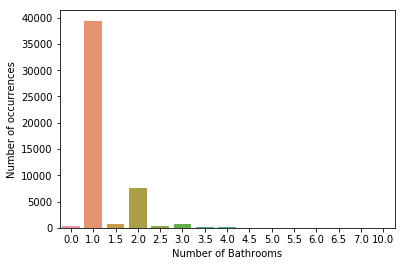

In [117]:
fig = plt.figure()
### Number of occurrences
sns.countplot(train.bathrooms);
plt.xlabel('Number of Bathrooms');
plt.ylabel('Number of occurrences');

顺便查看bathrooms与标签之间的关系 不同interest_level下的bathrooms散点图：stripplot 散点图有时会重叠，所以打点时有某种随机的jitter


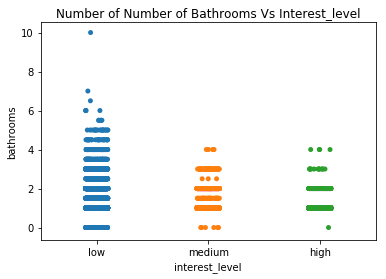

In [118]:
order = ['low', 'medium', 'high']
sns.stripplot(train["interest_level"],train["bathrooms"],jitter=True,order=order)
plt.title("Number of Number of Bathrooms Vs Interest_level");

There is 1 house listing with 10 bathrooms. I think we can treat that as outlier. Lets remove it and plot again.

从直方图也可以看出超过4个bathroom的房子很少


In [119]:
#ulimit = np.percentile(train.bathrooms.values, 99.5)
ulimit = 10
#train['bathrooms'].ix[train['bathrooms']>ulimit] = ulimit

# 删除y大于40的样本
train = train[train['bathrooms'] < ulimit]

In [120]:
train.shape

(49351, 16)

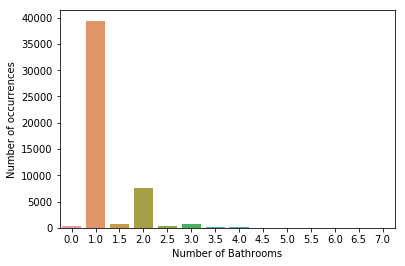

In [121]:
fig = plt.figure()
### Number of occurrences
sns.countplot(train.bathrooms);
plt.xlabel('Number of Bathrooms');
plt.ylabel('Number of occurrences');

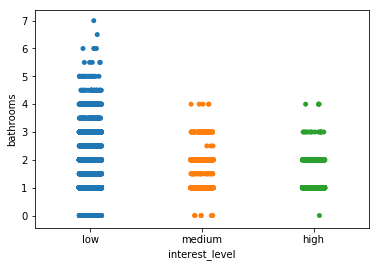

In [122]:
sns.stripplot(y="bathrooms", x="interest_level",data=train,jitter=True,order=order);

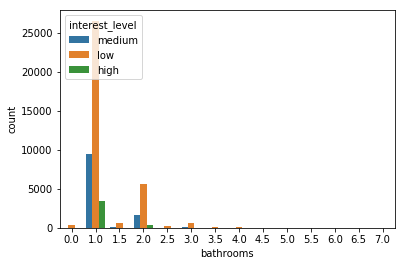

In [123]:
sns.countplot(x="bathrooms", hue="interest_level",data=train);

没有bathroom的房子极少high interest
Bedrooms


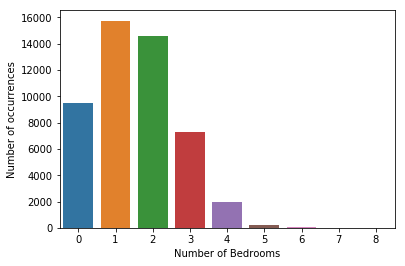

In [124]:
fig = plt.figure()
### Number of occurrences
sns.countplot(train.bedrooms);
plt.xlabel('Number of Bedrooms');
plt.ylabel('Number of occurrences');


查看bedrooms与标签之间的关系

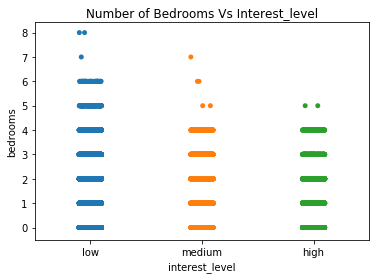

In [ ]:
order = ['low', 'medium', 'high']
sns.stripplot(train["interest_level"],train["bedrooms"],jitter=True,order=order)
plt.title("Number of Bedrooms Vs Interest_level");

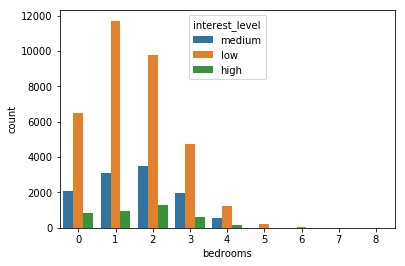

In [ ]:
sns.countplot(x="bedrooms", hue="interest_level",data=train);

Price

Looks like there are some outliers in this feature. So let us remove them and then plot again.


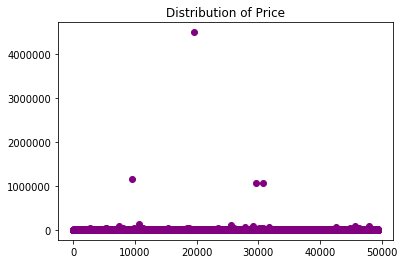

In [ ]:
plt.scatter(range(train.shape[0]), train["price"].values,color='purple')
plt.title("Distribution of Price");

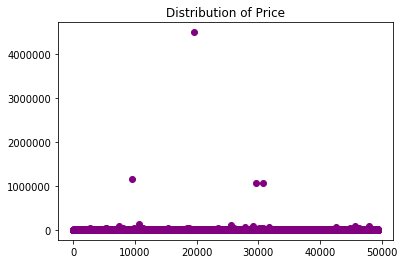

In [ ]:
plt.scatter(range(train.shape[0]), train["price"].values,color='purple')
plt.title("Distribution of Price");

/usr/local/python36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


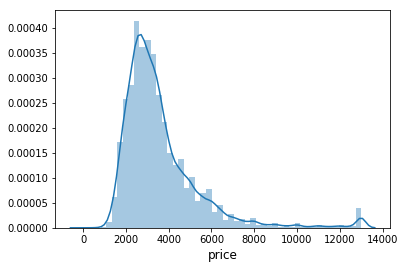

In [ ]:
ulimit = np.percentile(train.price.values, 99)
train['price'].ix[train['price']>ulimit] = ulimit

sns.distplot(train.price.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

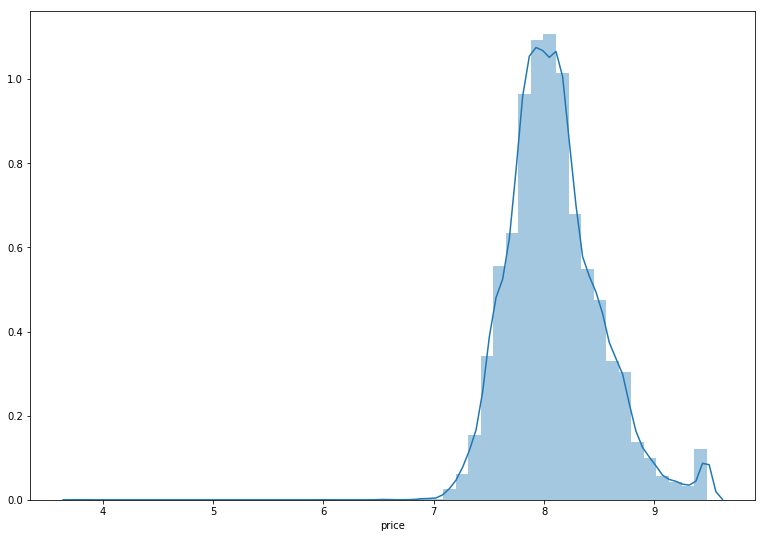

In [ ]:
plt.figure(figsize=(13,9))
sns.distplot(np.log1p(train["price"]))

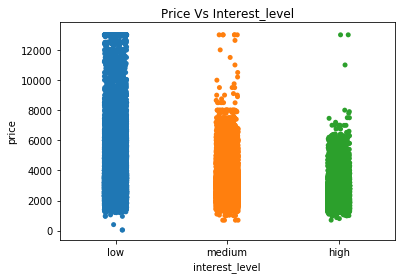

In [ ]:
order = ['low', 'medium', 'high']
sns.stripplot(train["interest_level"],train["price"],jitter=True,order=order)
plt.title("Price Vs Interest_level");

low interest的price看起来均匀分布，medium和high的price更多在1500-8000之间

violinplot提供在不同类别条件下特征更多的分布信息： 核密度估计（KDE） 三个四分位数quartile（1/4，1/2， 3/4） 1.5倍四分位间距(nterquartile range，IQR)： IQR：第三四分位数和第一四分位数的区别（即Q1~Q3 的差距），表示变量分散情形，比方差更稳健的统计量


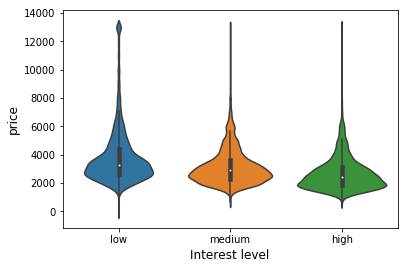

In [ ]:
order = ['low', 'medium', 'high']
sns.violinplot(x='interest_level', y='price', data=train, order = order)
plt.xlabel('Interest level', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

listing_id¶

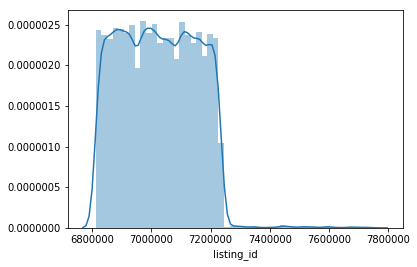

In [ ]:
sns.distplot(train.listing_id.values, bins=50, kde=True)
plt.xlabel('listing_id')
plt.show()

listing_id与标签之间的关系

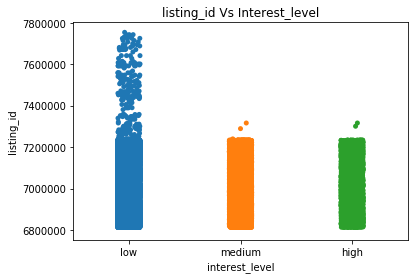

In [ ]:
order = ['low', 'medium', 'high']
sns.stripplot(train["interest_level"],train["listing_id"],jitter=True,order=order)
plt.title("listing_id Vs Interest_level");

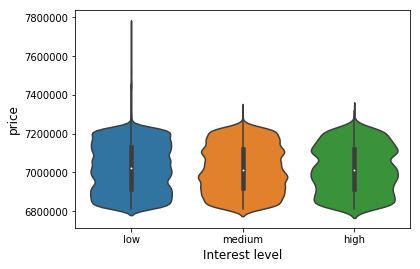

In [ ]:
order = ['low', 'medium', 'high']
sns.violinplot(x='interest_level', y='listing_id', data=train, order = order)
plt.xlabel('Interest level', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

地理位置：Latitude & Longitude

Latitude & Longitude虽然是数值型变量，但其物理含义是房屋的地理位置。

上述显示去掉了经度和纬度偏大或偏小的数据点。可以看出high interet的房屋在一小段很集中。可以load google earth 进一步看看其具体位置。 下面两段代码都是现实地图，可任选一段试试。不过需要先安装相应的工具包。


from mpl_toolkits.basemap import Basemap 
from matplotlib import cm

west, south, east, north = -74.02, 40.64, -73.85, 40.86

fig = plt.figure(figsize=(14,10)) 
ax = fig.add_subplot(111) 
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north, llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i') 
x, y = m(train['longitude'].values, train['latitude'].values) 
m.hexbin(x, y, gridsize=200, bins='log', cmap=cm.YlOrRd_r);

import gpxpy as gpx 
import gpxpy.gpx

gpx = gpxpy.gpx.GPX()

for index, row in train.iterrows():

#print (row['latitude'], row['longitude'])
  if row['interest_level'] == 'high': #opting for all nominals results in poor performance of Google Earth
    gps_waypoint = gpxpy.gpx.GPXWaypoint(row['latitude'],row['longitude'],elevation=10)
    gpx.waypoints.append(gps_waypoint)

filename = "GoogleEarth.gpx" 
FILE = open(filename,"w") 
FILE.writelines(gpx.to_xml())
FILE.close() 


/usr/local/python36/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


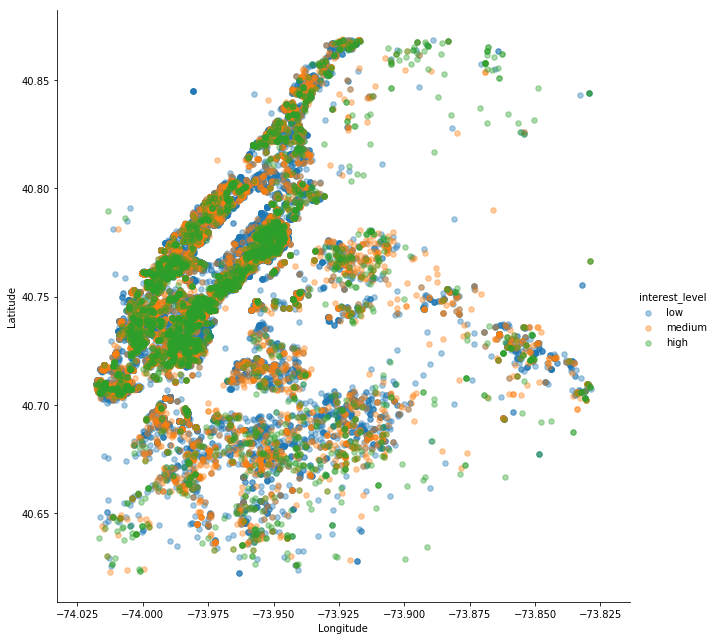

In [ ]:
sns.lmplot(x="longitude", y="latitude", fit_reg=False, hue='interest_level',
           hue_order=['low', 'medium', 'high'], size=9, scatter_kws={'alpha':0.4,'s':30},
           data=train[(train.longitude>train.longitude.quantile(0.005))
                           &(train.longitude<train.longitude.quantile(0.995))
                           &(train.latitude>train.latitude.quantile(0.005))                           
                           &(train.latitude<train.latitude.quantile(0.995))]);
plt.xlabel('Longitude');
plt.ylabel('Latitude');

Display_address that appear less than 2 times: 63.22%
Display_address that appear less than 10 times: 89.6%
Display_address that appear less than 50 times: 97.73%
Display_address that appear less than 100 times: 99.26%
Display_address that appear less than 500 times: 100.0%


Text(0, 0.5, 'log(Count)')

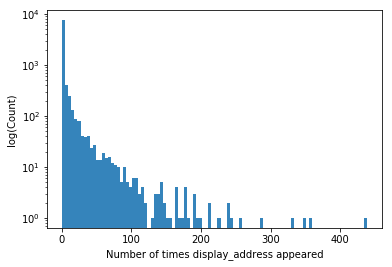

In [ ]:
cnt_srs = train.groupby('display_address')['display_address'].count()

for i in [2, 10, 50, 100, 500]:
    print('Display_address that appear less than {} times: {}%'.format(i, round((cnt_srs < i).mean() * 100, 2)))

plt.figure()
plt.hist(cnt_srs.values, bins=100, log=True, alpha=0.9)
#sns.distplot(cnt_srs.values, bins=100)
plt.xlabel('Number of times display_address appeared')
plt.ylabel('log(Count)')

/usr/local/python36/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


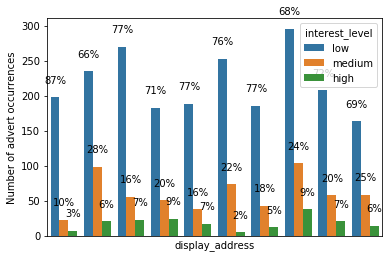

In [ ]:
### Let's get a list of top 10 display address
top10da = train.display_address.value_counts().nlargest(10).index.tolist()

fig = plt.figure()
ax = sns.countplot(x="display_address", hue="interest_level",
                   data=train[train.display_address.isin(top10da)]);
plt.xlabel('display_address');
plt.ylabel('Number of advert occurrences');
### Manager_ids are too long. Let's remove them
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off');

### Adding percents over bars
height = [0 if np.isnan(p.get_height()) else p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 20,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center")

building_id¶

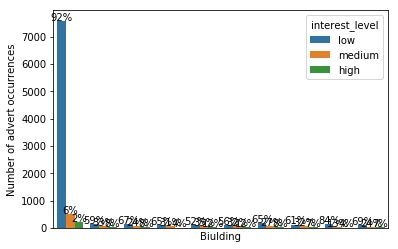

In [ ]:
### Let's get a list of top 10 building id
top10building = train.building_id.value_counts().nlargest(10).index.tolist()
### ...and plot number of different Interest Level rental adverts for each of them
fig = plt.figure()
ax = sns.countplot(x="building_id", hue="interest_level",
                   data=train[train.building_id.isin(top10building)]);
plt.xlabel('Biulding');
plt.ylabel('Number of advert occurrences');
### Manager_ids are too long. Let's remove them
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off');

### Adding percents over bars
height = [0 if np.isnan(p.get_height()) else p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 20,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center")

manager_id

处理方法类似building_id


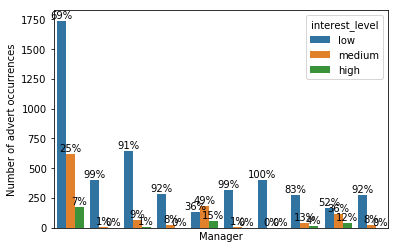

In [ ]:
### Let's get a list of top 10 managers
top10managers = train.manager_id.value_counts().nlargest(10).index.tolist()
### ...and plot number of different Interest Level rental adverts for each of them
fig = plt.figure()
ax = sns.countplot(x="manager_id", hue="interest_level",
                   data=train[train.manager_id.isin(top10managers)]);
plt.xlabel('Manager');
plt.ylabel('Number of advert occurrences');
### Manager_ids are too long. Let's remove them
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off');

### Adding percents over bars
height = [0 if np.isnan(p.get_height()) else p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 20,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center")

created date

日期型特征


In [ ]:
train['created'] = pd.to_datetime(train['created'])
train['date'] = train['created'].dt.date
train["year"] = train["created"].dt.year
train['month'] = train['created'].dt.month
train['day'] = train['created'].dt.day
train['hour'] = train['created'].dt.hour
train['weekday'] = train['created'].dt.weekday
train['week'] = train['created'].dt.week
train['quarter'] = train['created'].dt.quarter
train['weekend'] = ((train['weekday'] == 5) & (train['weekday'] == 6))
train['wd'] = ((train['weekday'] != 5) & (train['weekday'] != 6))

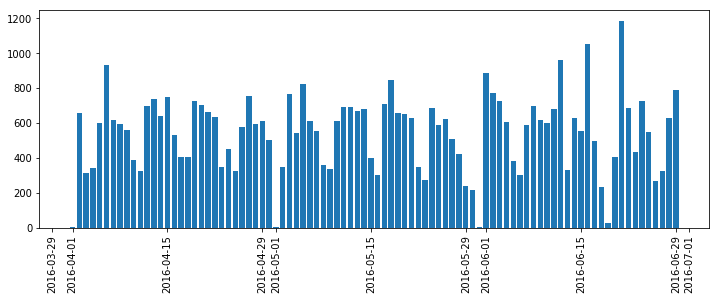

In [ ]:
cnt_srs = train['date'].value_counts()

plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

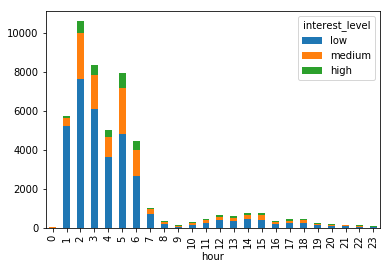

In [ ]:
hourDF = train.groupby(['hour', 'interest_level'])['hour'].count().unstack('interest_level').fillna(0)
hourDF[['low','medium',"high"]].plot(kind='bar', stacked=True);

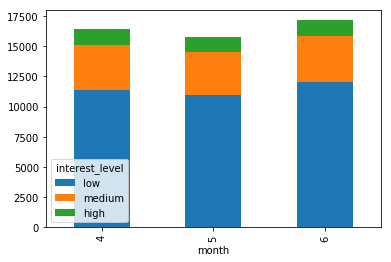

In [ ]:
monthDF = train.groupby(['month', 'interest_level'])['month'].count().unstack('interest_level').fillna(0)
monthDF[['low','medium',"high"]].plot(kind='bar', stacked=True);

Photo Numbers

/usr/local/python36/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/python36/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


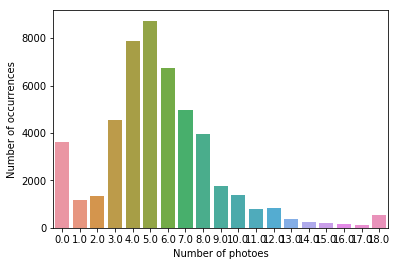

In [ ]:
train['num_photos'] = train['photos'].apply(len)
ulimit = np.percentile(train.num_photos.values, 99)
train['num_photos'].ix[train['num_photos']>ulimit] = ulimit

sns.countplot(train.num_photos);
plt.xlabel('Number of photoes');
plt.ylabel('Number of occurrences');

/usr/local/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


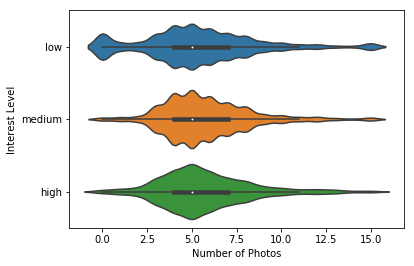

In [ ]:
train['num_photos'].ix[train['num_photos']>15] = 15
#sns.stripplot(y="num_photos", x="interest_level",data=train,jitter=True,order=order);

plt.figure()
sns.violinplot(x="num_photos", y="interest_level", data=train, order =['low','medium','high'])
plt.xlabel('Number of Photos')
plt.ylabel('Interest Level')
plt.show()

Features Length

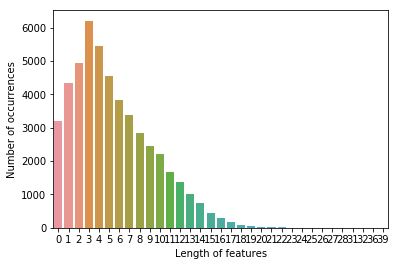

In [ ]:
train['len_features'] = train['features'].apply(len)

sns.countplot(train.len_features);
plt.xlabel('Length of features');
plt.ylabel('Number of occurrences');

/usr/local/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


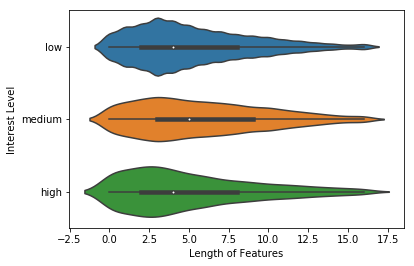

In [ ]:
train['len_features'].ix[train['len_features'] > 16] = 16

plt.figure()
sns.violinplot(x="len_features", y="interest_level", data=train, order =['low','medium','high'])
plt.xlabel('Length of Features')
plt.ylabel('Interest Level')
plt.show()

desctiprion words counts

In [ ]:
train['num_description_words'] = train['description'].apply(lambda x: len(x.split(' ')))
train['len_description'] = train['description'].apply(len)

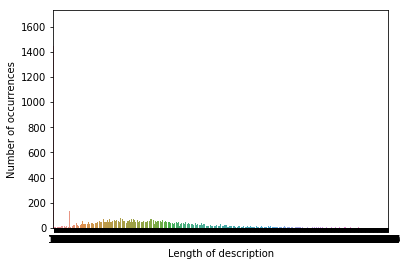

In [ ]:
sns.countplot(train.len_description);
plt.xlabel('Length of description');
plt.ylabel('Number of occurrences');

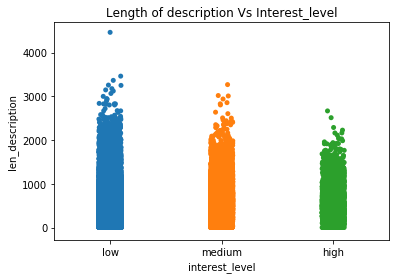

In [ ]:
fig = plt.figure()
order = ['low', 'medium', 'high']
#ulimit = np.percentile(train.len_description.values, 99)
#train['len_description'].ix[train['len_description']>ulimit] = ulimit

sns.stripplot(train["interest_level"],train["len_description"],jitter=True,order=order)
plt.title("Length of description Vs Interest_level");

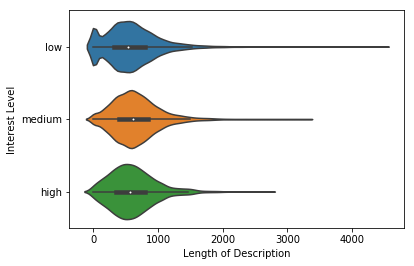

In [ ]:
plt.figure()
sns.violinplot(x="len_description", y="interest_level", data=train, order =['low','medium','high'])
plt.xlabel('Length of Description')
plt.ylabel('Interest Level')
plt.show()

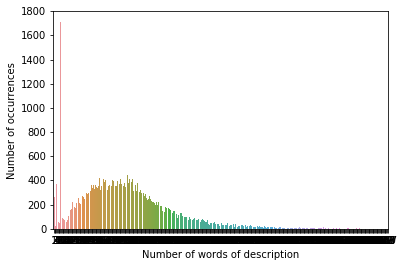

In [ ]:
sns.countplot(train.num_description_words);
plt.xlabel('Number of words of description');
plt.ylabel('Number of occurrences');

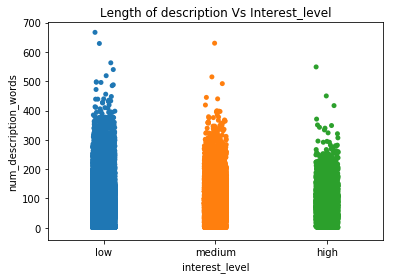

In [ ]:
fig = plt.figure()
order = ['low', 'medium', 'high']
#ulimit = np.percentile(train.num_description_words.values, 99)
#ulimit = 500
#train['num_description_words'].ix[train['num_description_words']>ulimit] = ulimit
sns.stripplot(train["interest_level"],train["num_description_words"],jitter=True,order=order)
plt.title("Length of description Vs Interest_level");

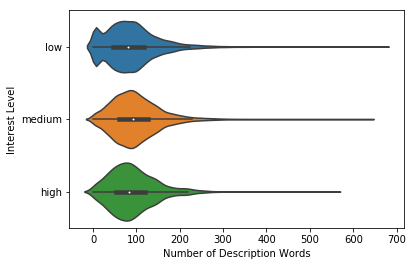

In [ ]:
plt.figure()
sns.violinplot(x="num_description_words", y="interest_level", data=train, order =['low','medium','high'])
plt.xlabel('Number of Description Words')
plt.ylabel('Interest Level')
plt.show()

词云(display_address, street_address, features)
WordCloud官网: https://amueller.github.io/word_cloud/ github: https://github.com/amueller/word_cloud

In [ ]:
from wordcloud import WordCloud

text = ''
text_da = ''
text_street = ''
#text_desc = ''
for ind, row in train.iterrows():
    for feature in row['features']:
        text = " ".join([text, "_".join(feature.strip().split(" "))])
    text_da = " ".join([text_da,"_".join(row['display_address'].strip().split(" "))])
    text_street = " ".join([text_street,"_".join(row['street_address'].strip().split(" "))])
    #text_desc = " ".join([text_desc, row['description']])
text = text.strip()
text_da = text_da.strip()
text_street = text_street.strip()
#text_desc = text_desc.strip()

plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for features", fontsize=30)
plt.axis("off")
plt.show()

# wordcloud for display address
plt.figure()
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text_da)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for Display Address", fontsize=30)
plt.axis("off")
plt.show()

# wordcloud for street address
plt.figure()
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text_street)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for Street Address", fontsize=30)
plt.axis("off")
plt.show()

特征之间的相关性


In [ ]:
contFeatureslist = []
contFeatureslist.append("bathrooms")
contFeatureslist.append("bedrooms")
contFeatureslist.append("price")

print(contFeatureslist)

In [ ]:
correlationMatrix = train[contFeatureslist].corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()

In [ ]:
deleteFileByPattern("./RentListingInquries*")